In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
d = pd.read_csv("crop_yield.csv")
d

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0,20.0,9.0
95,425.0,60.0,39.0,65.0,19.0,17.0,6.5
96,1220.0,79.0,28.0,77.0,23.0,21.0,10.5
97,480.0,65.0,36.0,68.0,21.0,16.0,7.0


**PREPROCESSING**

In [3]:
x = d.iloc[:,:5]
x

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P)
0,1230.0,80.0,28.0,80.0,24.0
1,480.0,60.0,36.0,70.0,20.0
2,1250.0,75.0,29.0,78.0,22.0
3,450.0,65.0,35.0,70.0,19.0
4,1200.0,80.0,27.0,79.0,22.0
...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0
95,425.0,60.0,39.0,65.0,19.0
96,1220.0,79.0,28.0,77.0,23.0
97,480.0,65.0,36.0,68.0,21.0


In [4]:
y = d.iloc[:,6]
y

0     12.0
1      8.0
2     11.0
3      9.0
4     11.0
      ... 
94     9.0
95     6.5
96    10.5
97     7.0
98    12.0
Name: Yeild (Q/acre), Length: 99, dtype: float64

**FEATURE SELECTION (FEATURE IMPORTANCE)**

In [5]:
model_fs = ExtraTreesRegressor()

In [6]:
fs = model_fs.fit(x,y)

In [7]:
fs.feature_importances_

array([0.42346184, 0.07676382, 0.36418754, 0.0920474 , 0.0435394 ])

<Axes: >

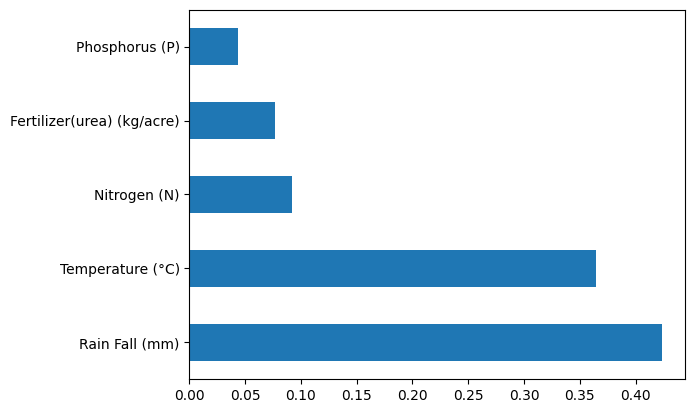

In [8]:
imp = pd.Series(fs.feature_importances_,index=x.columns)
imp.nlargest(5).plot(kind="barh")

*FEATURE SCALING - no need for tree based algorithm*

**SPLITTING THE DATA**

In [9]:
x = x.to_numpy()
y = y.to_numpy()

In [10]:
y

array([12. ,  8. , 11. ,  9. , 11. , 10. , 11. ,  7. , 12. ,  6. , 12. ,
        8. , 11. ,  9. , 11. ,  5.5, 12. ,  7. , 11. , 12. ,  6. , 11. ,
        7. , 10. ,  9. , 10. ,  6. , 12. ,  7. , 10. , 11. ,  6. , 11. ,
        7. , 10. ,  9. , 10. ,  6. , 12. ,  8. , 11. ,  7. , 11. ,  6. ,
       11. ,  7. , 11. ,  8. , 10. ,  6. , 11. ,  6. , 11. ,  6.5, 10. ,
        7.5, 11. ,  9. , 10. ,  7. , 11. ,  6.5, 11. ,  7. , 11. ,  7. ,
       11. ,  7. , 10. ,  8.5,  9.5,  7.5, 10.5,  7. , 10. ,  7.5, 12. ,
        6. , 10. ,  7.5,  9.5,  8. ,  9.5,  8.5,  9. ,  8. , 10. ,  8. ,
       11. ,  6.5, 11. ,  7. ,  9. ,  8. ,  9. ,  6.5, 10.5,  7. , 12. ])

In [11]:
x

array([[1230.,   80.,   28.,   80.,   24.],
       [ 480.,   60.,   36.,   70.,   20.],
       [1250.,   75.,   29.,   78.,   22.],
       [ 450.,   65.,   35.,   70.,   19.],
       [1200.,   80.,   27.,   79.,   22.],
       [ 500.,   70.,   34.,   74.,   22.],
       [1275.,   71.,   28.,   77.,   21.],
       [ 425.,   65.,   37.,   67.,   18.],
       [1200.,   77.,   27.,   78.,   23.],
       [ 400.,   50.,   39.,   60.,   18.],
       [1280.,   80.,   26.,   80.,   24.],
       [ 415.,   55.,   38.,   65.,   19.],
       [1225.,   79.,   29.,   79.,   23.],
       [ 425.,   50.,   37.,   65.,   18.],
       [1250.,   70.,   24.,   70.,   22.],
       [ 400.,   60.,   39.,   60.,   18.],
       [1300.,   80.,   28.,   80.,   24.],
       [ 410.,   55.,   36.,   65.,   21.],
       [1150.,   77.,   28.,   76.,   23.],
       [1200.,   78.,   27.,   78.,   23.],
       [ 410.,   50.,   37.,   59.,   19.],
       [1280.,   76.,   26.,   75.,   24.],
       [ 425.,   55.,   38.,   6

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [13]:
x_train

array([[ 450.,   50.,   37.,   60.,   18.],
       [1245.,   77.,   27.,   75.,   22.],
       [1225.,   75.,   29.,   77.,   23.],
       [ 400.,   60.,   39.,   60.,   18.],
       [ 440.,   58.,   37.,   66.,   22.],
       [ 450.,   55.,   38.,   65.,   19.],
       [ 400.,   50.,   39.,   60.,   18.],
       [ 450.,   65.,   38.,   60.,   20.],
       [ 415.,   55.,   38.,   65.,   19.],
       [ 410.,   55.,   38.,   68.,   20.],
       [1250.,   77.,   28.,   78.,   23.],
       [1150.,   80.,   26.,   75.,   21.],
       [ 405.,   55.,   36.,   60.,   21.],
       [ 410.,   52.,   40.,   62.,   19.],
       [ 500.,   70.,   34.,   74.,   22.],
       [ 460.,   55.,   38.,   61.,   20.],
       [ 455.,   60.,   38.,   65.,   20.],
       [ 500.,   50.,   37.,   65.,   18.],
       [1300.,   80.,   28.,   80.,   24.],
       [1200.,   79.,   27.,   77.,   23.],
       [1200.,   73.,   29.,   73.,   23.],
       [ 425.,   65.,   37.,   67.,   18.],
       [ 455.,   58.,   37.,   6

In [14]:
y_test

array([11. , 11. ,  6.5, 11. ,  7. ,  9. , 11. , 11. , 12. , 12. ,  6. ,
       12. ,  8. ,  6. , 11. , 11. ,  7. , 11. , 11. ,  7. ])

In [15]:
x_train

array([[ 450.,   50.,   37.,   60.,   18.],
       [1245.,   77.,   27.,   75.,   22.],
       [1225.,   75.,   29.,   77.,   23.],
       [ 400.,   60.,   39.,   60.,   18.],
       [ 440.,   58.,   37.,   66.,   22.],
       [ 450.,   55.,   38.,   65.,   19.],
       [ 400.,   50.,   39.,   60.,   18.],
       [ 450.,   65.,   38.,   60.,   20.],
       [ 415.,   55.,   38.,   65.,   19.],
       [ 410.,   55.,   38.,   68.,   20.],
       [1250.,   77.,   28.,   78.,   23.],
       [1150.,   80.,   26.,   75.,   21.],
       [ 405.,   55.,   36.,   60.,   21.],
       [ 410.,   52.,   40.,   62.,   19.],
       [ 500.,   70.,   34.,   74.,   22.],
       [ 460.,   55.,   38.,   61.,   20.],
       [ 455.,   60.,   38.,   65.,   20.],
       [ 500.,   50.,   37.,   65.,   18.],
       [1300.,   80.,   28.,   80.,   24.],
       [1200.,   79.,   27.,   77.,   23.],
       [1200.,   73.,   29.,   73.,   23.],
       [ 425.,   65.,   37.,   67.,   18.],
       [ 455.,   58.,   37.,   6

In [16]:
y_test

array([11. , 11. ,  6.5, 11. ,  7. ,  9. , 11. , 11. , 12. , 12. ,  6. ,
       12. ,  8. ,  6. , 11. , 11. ,  7. , 11. , 11. ,  7. ])

**CHOOSING THE MODEL**

In [17]:
regressor = DecisionTreeRegressor()

**HYPER PARAMETER TUNING**

In [18]:
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]

In [19]:
splitter = ["best","random"]

In [20]:
max_depth = [int(i) for i in np.linspace(5,50,10)]

In [21]:
min_samples_split = [int(i) for i in np.linspace(5,100,20)]

In [22]:
min_samples_leaf = [int(i) for i in np.linspace(5,100,20)]

In [23]:
max_features = ["sqrt","log2"]

In [24]:
random_state = [int(i) for i in np.linspace(5,70,10)]

In [25]:
max_leaf_nodes = [3,None]

In [26]:
random_grid = {"criterion":criterion,
              "splitter":splitter,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
               "max_features":max_features,
              "random_state":random_state,
              "max_leaf_nodes":max_leaf_nodes}
random_grid

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'min_samples_split': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100],
 'min_samples_leaf': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100],
 'max_features': ['sqrt', 'log2'],
 'random_state': [5, 12, 19, 26, 33, 41, 48, 55, 62, 70],
 'max_leaf_nodes': [3, None]}

In [27]:
model = RandomizedSearchCV(estimator = regressor,
                          param_distributions = random_grid,
                          scoring = "neg_mean_squared_error",
                          cv = 5,
                          verbose = 2,
                          random_state = 44,
                          n_jobs = 1)

**TRAINING THE MODEL**

In [28]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=65, min_samples_split=15, random_state=19, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=65, min_samples_split=15, random_state=19, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=65, min_samples_split=15, random_state=19, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=65, min_samples_split=15, random_state=19, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=log2, max_leaf_nodes=None, min_samples_leaf=65, min_samples_split=15, random_state=19, splitter=random; total time=   0.0s
[CV] END criterion=

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [3, None],
                                        'min_samples_leaf': [5, 10, 15, 20, 25,
                                                             30, 35, 40, 45, 50,
                                                             55, 60, 65, 70, 75,
                                                             80, 85, 90, 95,
                                                             100],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 65,
                                                              70, 75, 80, 85,
                                                              90, 95, 100],
                                        'random_state': [5, 12, 19, 26, 33, 41,
                                                         48, 55, 62, 70],
                                        'splitter': ['best', 'random']},
                   random_state=44, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
model.best_params_

{'splitter': 'random',
 'random_state': 12,
 'min_samples_split': 35,
 'min_samples_leaf': 25,
 'max_leaf_nodes': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'squared_error'}

**PREDICTING WITH MODEL**

In [30]:
y_test

array([11. , 11. ,  6.5, 11. ,  7. ,  9. , 11. , 11. , 12. , 12. ,  6. ,
       12. ,  8. ,  6. , 11. , 11. ,  7. , 11. , 11. ,  7. ])

In [31]:
y_pred = model.predict(x_test)
y_pred

array([10.59210526, 10.59210526,  7.36585366, 10.59210526,  7.36585366,
       10.59210526, 10.59210526, 10.59210526, 10.59210526, 10.59210526,
        7.36585366, 10.59210526,  7.36585366,  7.36585366, 10.59210526,
       10.59210526,  7.36585366, 10.59210526, 10.59210526,  7.36585366])

**TESTING THE MODEL**

In [32]:
df = pd.DataFrame({"Actual Yeild":y_test,"Prdicted Yield":y_pred})
df

,Actual Yeild,Prdicted Yield
0,11.0,10.592105
1,11.0,10.592105
2,6.5,7.365854
3,11.0,10.592105
4,7.0,7.365854
5,9.0,10.592105
6,11.0,10.592105
7,11.0,10.592105
8,12.0,10.592105
9,12.0,10.592105


<Axes: title={'center': 'Feature-correlation (pearson)'}>

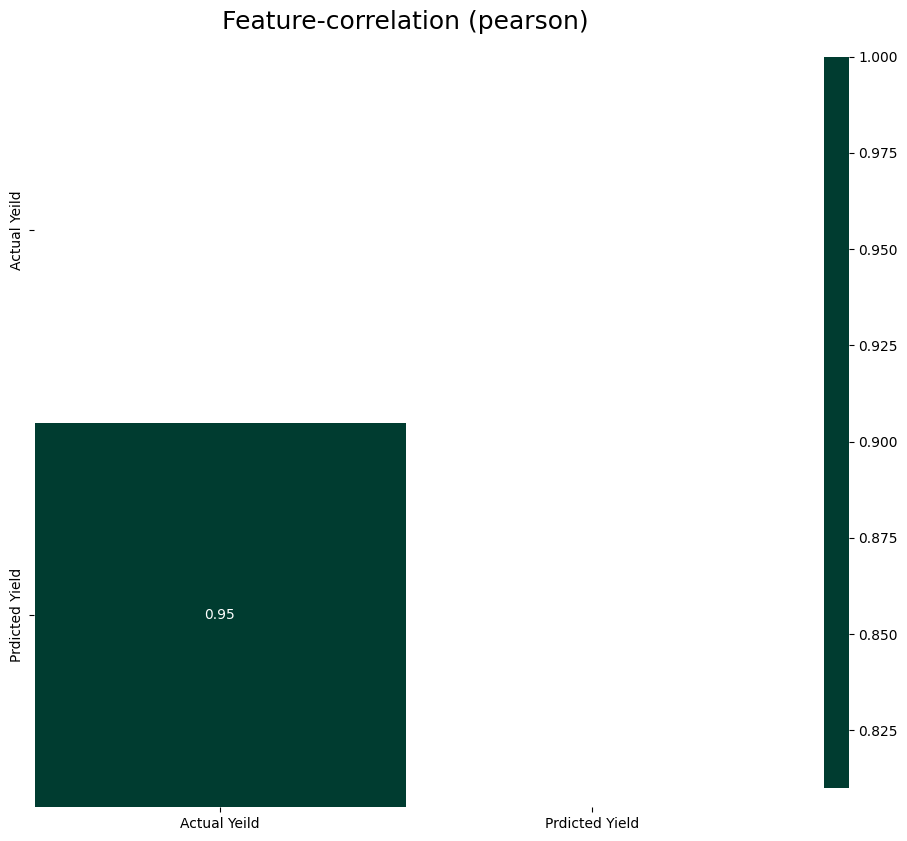

In [33]:
klib.corr_plot(df)

<Axes: >

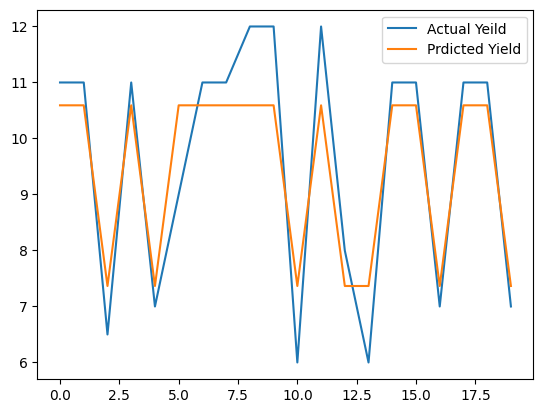

In [34]:
df.plot()

**PERFORMANCE METRICS**

In [35]:
mean_squared_error(y_test,y_pred)

0.7631604129005781

In [36]:
mean_absolute_error(y_test,y_pred)

0.740805519897304

In [37]:
model.score(x_test,y_test)

-0.7631604129005781

In [38]:
r2_score(y_test,y_pred)

0.8369968414576259